## Sobre o dataset
O conjunto de dados veio de uma enquete com os clientes da BoraBusão e queremos saber se com estes dados podemos prever a satisfação dos mesmos com os serviços da empresa. (Lembrando que tanto a empresa citada quanto os dados são fictícios e alterados)

### Features e contexto
* ID: Identificação do cliente
* Genero: Gênero do cliente
* PlanoFidelidade: Se o cliente possui ou não o plano fidelidade da BoraBusão
* Idade: Idade do cliente
* RazaoViagem: Motivo da viagem ( pessoal ou a trabalho? )
* CategoriaPassagem: Em qual catergoria ele está viajando? Normal, Comforto ou Leito
* DistanciaKm: A distancia do trecho de viagem
* WiFi: Possui WiFi no ônibus, o serviço está bom?
* ConvenienciaHorarios: Os horários de partida e chagada são convenientes?
* FacilidadeReservaViaApp: Nível de facilidade de fazer a reserva da passagem
* PontosLocalização: A localização dos pontos de ônibus é boa, qual a satisfação com relação a esse ponto
* Alimentação: A alimentação servida no oninbus e nos pontos, qual a sua avaliação?
* CheckInViaApp: Facilidade de fazer o checkIn via o app
* ConfortoInterno: Nível de conforto do ônibus ( cadeiras, ar-condicionado)
* ServicosIntegracao: Nível de satisfação desde a chegada até o embarque.
* SalaDeEspera: Nível de satisfação com a sala de espera de quem tem o plano Fidelidade
* Bagagem: Nível de satisfação com o serviço e manuseamento da bagagem do passageiro
* ServicoCheckin: Nivel de satisfaçao com o serviço de checkin local
* ServicoDeBordo: Nível de satisfação com o serviço de bordo
* Limpeza: Nível de satisfação com a Limpeza
* AtrasoNaSaída: Atraso em minutos na partida
* AtrasoNaChegada: Atraso em minuto na chegada
* SatisfacaoGeral: Variável alvo, o cliente está satisfeito ou não

## Importações de módulos e configurações

In [44]:
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.font_manager
import plotly.express as px

## Funções auxiliares

In [72]:
def dm_colors(n_colors=10, as_cmap=False):
    if(as_cmap):
        return LinearSegmentedColormap.from_list(
        "Custom", ["#ff5871", "#68e699"], N=n_colors)
    colors = ["#202ad0", "#ff9a98", "#ffe372", "#7df4ed", "#68e699", "#000033", "#42d6fd", "#ff5871", "#ffc000", "#00c8ba"]
    return sns.color_palette(palette=colors, n_colors=n_colors, as_cmap=as_cmap)


In [107]:
def set_dm_theme():
    sns.set_theme(palette=dm_colors(), font_scale=1, font='Arial')

In [108]:
set_dm_theme()

## 1 - Data Collection

In [109]:
df = pd.read_csv('../data/processed/BoraBusTratado.csv')
df.head()

,ID,Genero,PlanoFidelidade,Idade,RazaoViagem,CategoriaPassagem,DistanciaKm,WiFi,ConvenienciaHorarios,FacilidadeReservaViaApp,PontosLocalizacao,Alimentacao,CheckInViaApp,ConfortoInterno,Entretenimento,ServicosIntegracao,SalaDeEspera,Bagagem,ServicoCheckIn,ServicoDeBordo,Limpeza&Higiene,AtrasoNaSaida,AtrasoNaChegada,SatisfacaoGeral
0,70172,Masculino,Sim,13,TurismoOuPessoal,Comforto,288.0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Nao
1,5047,Masculino,Nao,25,NegociosOuTrabalho,Leito,147.0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Nao
2,110028,Feminino,Sim,26,NegociosOuTrabalho,Leito,714.0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Sim
3,24026,Feminino,Sim,25,NegociosOuTrabalho,Leito,351.0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Nao
4,119299,Masculino,Sim,61,NegociosOuTrabalho,Leito,134.0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Sim


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       103904 non-null  int64  
 1   Genero                   103904 non-null  object 
 2   PlanoFidelidade          103904 non-null  object 
 3   Idade                    103904 non-null  int64  
 4   RazaoViagem              103904 non-null  object 
 5   CategoriaPassagem        103904 non-null  object 
 6   DistanciaKm              103904 non-null  float64
 7   WiFi                     103904 non-null  int64  
 8   ConvenienciaHorarios     103904 non-null  int64  
 9   FacilidadeReservaViaApp  103904 non-null  int64  
 10  PontosLocalizacao        103904 non-null  int64  
 11  Alimentacao              103904 non-null  int64  
 12  CheckInViaApp            103904 non-null  int64  
 13  ConfortoInterno          103904 non-null  int64  
 14  Entr

## 2 - Data Analysis

### Análise de dados nulos
* Vamos realizar uma análise dos dados nulos a fim de verificar se existe algum dado nulo e se ele representa alguma informação

Text(0.5, 1.0, 'Heatmap de nulidade dos valores (verde significa nulo)')

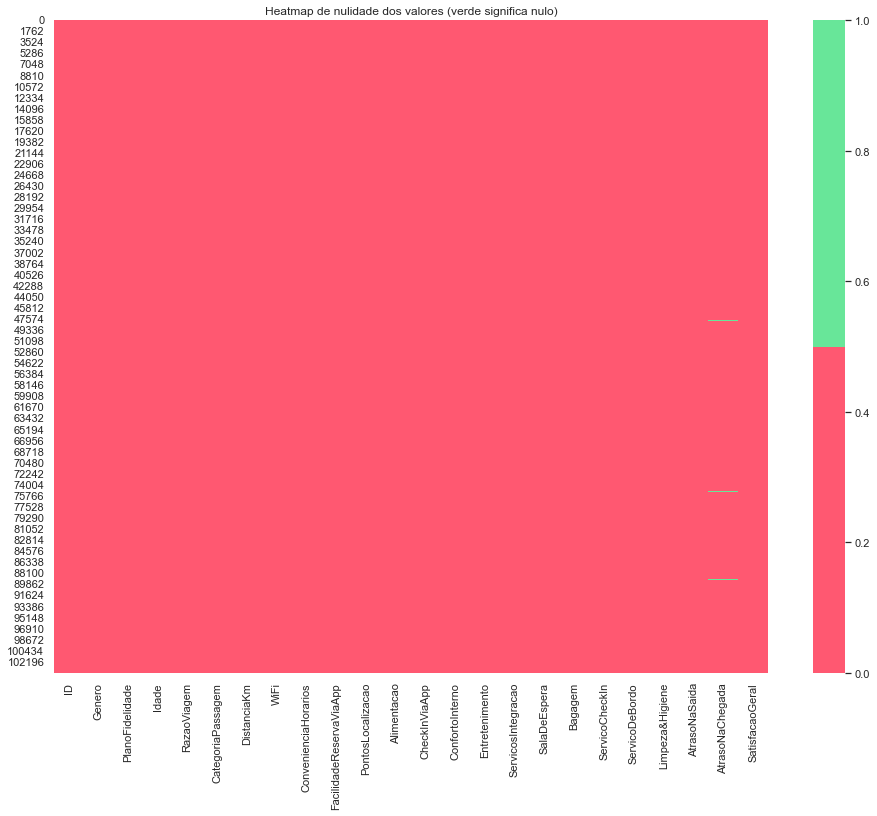

In [111]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.isna(), annot=False, cmap=dm_colors(n_colors=2, as_cmap=True))
plt.title('Heatmap de nulidade dos valores (verde significa nulo)')

In [112]:
df["AtrasoNaChegada"].value_counts()

0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: AtrasoNaChegada, Length: 455, dtype: int64

* Verificando se existe algum valor 0, pois caso exista poderia existir a hipótese de que nulo fosse sem atraso. Porém esse não é o caso.

In [113]:
df[df["AtrasoNaChegada"].isna()]

,ID,Genero,PlanoFidelidade,Idade,RazaoViagem,CategoriaPassagem,DistanciaKm,WiFi,ConvenienciaHorarios,FacilidadeReservaViaApp,PontosLocalizacao,Alimentacao,CheckInViaApp,ConfortoInterno,Entretenimento,ServicosIntegracao,SalaDeEspera,Bagagem,ServicoCheckIn,ServicoDeBordo,Limpeza&Higiene,AtrasoNaSaida,AtrasoNaChegada,SatisfacaoGeral
213,49608,Feminino,Sim,38,NegociosOuTrabalho,Normal,68.0,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,Sim
1124,73442,Masculino,Sim,53,TurismoOuPessoal,Normal,632.0,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,Nao
1529,71178,Masculino,Sim,39,NegociosOuTrabalho,Leito,458.0,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,Nao
2004,72940,Feminino,Nao,26,NegociosOuTrabalho,Leito,647.0,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,Nao
2108,116374,Feminino,Sim,24,TurismoOuPessoal,Normal,261.0,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,Nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Masculino,Sim,49,TurismoOuPessoal,Comforto,781.0,2,5,2,3,2,3,3,3,4,5,4,3,4,3,230,NaN,Nao
102384,71241,Masculino,Sim,58,NegociosOuTrabalho,Normal,458.0,3,3,3,3,3,3,3,3,3,1,2,4,2,3,55,NaN,Nao
102552,27684,Feminino,Nao,29,NegociosOuTrabalho,Normal,692.0,2,1,1,1,5,1,3,5,4,1,5,5,3,5,0,NaN,Nao
102960,36787,Masculino,Sim,58,NegociosOuTrabalho,Normal,680.0,4,4,1,1,5,4,5,5,1,5,5,5,3,5,0,NaN,Sim
